# Exercise 5 

## b)

In [4]:
import numpy as np
from project_a1.random import LCG
import matplotlib.pyplot as plt

# Task b)

def check_array (value, array):
    for i in range(len(array)):
        if array[i] == value:
            return False
    return True        

def periodtest(a1):
    seed1 = 0
    i = 0
    gen = LCG(seed = seed1, a = a1, c = 3, m = 1024)
    x = np.zeros(1024)
    gen.advance()
    while i <= 1024 and (gen.state != seed1) and check_array(gen.state, x):
        x[i] = gen.state
        gen.advance()
        i =  i + 1
    return i    

print("a = 10: periodlength = ", periodtest(10))
print("a =  1: periodlength = ", periodtest(1))
print("a = 69: periodlength = ",periodtest(69))
print("a =  5: periodlength = ",periodtest(5))
print("a =  3: periodlength = ",periodtest(3))
print("a =  4: periodlength = ",periodtest(4))

a = 10: periodlength =  10
a =  1: periodlength =  1023
a = 69: periodlength =  1023
a =  5: periodlength =  1023
a =  3: periodlength =  511
a =  4: periodlength =  5


Diffrent parameters $a$ result in diffrent period lenghts. The Maximum period length is equal to the parameter $m = 1024$ and
is reached for $a$'s that fulfill the following conditions:
- $a-1$ and $m$ are divisible by $4$
- each prime factor of $m$ divides $a-1$
The prime factor of $m = 1024$ is $2$ --> $a-1$ must be divisible by $2$ and $4$. E.g. $a = 69$ an $a = 5$ are such ideal numbers.

## d) - f)

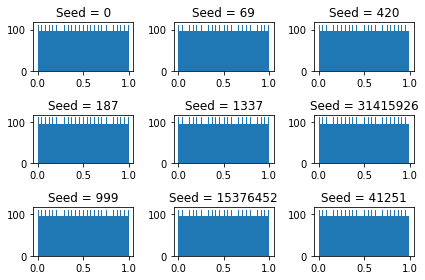

In [6]:
# Tasks d) - f)

# Numpy generator
rng = np.random.default_rng(420)
x, y, z = rng.uniform(size = (3, 10000))

# Our LCG
gen = LCG(seed = 0, a = 1601, c = 3456, m = 10000)          # Exercise Parameters
x2, y2, z2 = gen.uniform(size = (3, 10000))

good_gen = LCG(seed = 0, a = 625, c = 6571, m = 31104)      # Good Parameters
x3, y3, z3 = good_gen.uniform(size = (3, 10000))

# Dependency on start value

values = [0, 69, 420, 187, 1337, 31415926, 999, 15376452, 41251]
fig0 = plt.figure()

for i in range(len(values)):
    ax = fig0.add_subplot(3, 3, i+1)
    tempgen = LCG(seed = values[i], a = 1601, c = 3456, m = 10000)
    ax.hist(tempgen.uniform(size = 10000), bins = 100)
    ax.set_title(f"Seed = {values[i]}")

fig0.tight_layout()
plt.show()

As it can be seen in the graphic diffrent start values (seeds) do not lead to a diffrent behaviour of the generator.


In the following the given LCG is compared to \textit{numpy}'s generator and the same LCG with better parameters.

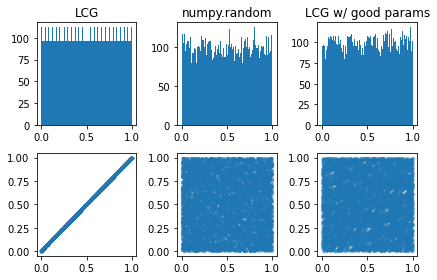

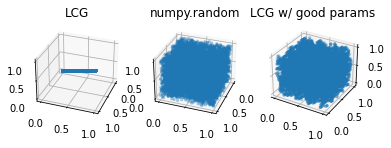

In [7]:
# Comparison of our LCG vs numpy.random

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(y2, bins = 100)            # Histogram of our "random" numbers
ax1.set_title("LCG")

ax2 = fig.add_subplot(2, 3, 4)
ax2.scatter(
    x2, y2,
    s=5,
    #smaller points
    alpha=0.3,
    # 70% transparency
)

ax3 = fig.add_subplot(2, 3, 2)
ax3.hist(y, bins = 100)             # histogram of numpy's random numbers
ax3.set_title("numpy.random")

ax4 = fig.add_subplot(2, 3, 5)
ax4.scatter(
    x, y,
    s=5,
    #smaller points
    alpha=0.3,
    #70% transparency
)

ax5 = fig.add_subplot(2, 3, 3)
ax5.hist(y3, bins = 100)             # histogram of numpy's random numbers
ax5.set_title("LCG w/ good params")

ax6 = fig.add_subplot(2, 3, 6)
ax6.scatter(
    x3, y3,
    s=5,
    #smaller points
    alpha=0.3,
    #70% transparency
)

fig.tight_layout()


# 3D Scatter-Plots

plt.show()

fig2 = plt.figure()

ax = fig2.add_subplot(1, 3, 1, projection='3d')

ax.scatter(
    x2, y2, z2,
    s=5,
    # smaller points
    alpha=0.3,
    # 70% transparency
)
ax.set_title("LCG")
# set the orientation of the 3d axis

ax.view_init(elev=30, azim=20)

ax2 = fig2.add_subplot(1, 3, 2, projection='3d')

ax2.scatter(
    x, y, z,
    s=5,
    # smaller points
    alpha=0.3,
    # 70% transparency
)
ax2.set_title("numpy.random")

# set the orientation of the 3d axis

ax2.view_init(elev=30, azim=20)

ax3 = fig2.add_subplot(1, 3, 3, projection='3d')

ax3.scatter(
    x3, y3, z3,
    s=5,
    # smaller points
    alpha=0.3,
    # 70% transparency
)
ax3.set_title("LCG w/ good params")
# set the orientation of the 3d axis

ax.view_init(elev=30, azim=20)

plt.show()

The plots on the leftern side show, that the given LCG ($a = 1601$, $c = 3456$ and $m = 10000$) does not match the requirements
of a good random generator. The periodlength is too short for high amounts of random numbers. 

# Exercise 6

## a)

$f(x) = \begin{cases} N \mathrm{e}^{-x/\tau} \qquad 0 \leq x < \infty \\ 0 \qquad \qquad else \end{cases}$

#### Determination of normilization constant $N$:


$\int_0^\infty N \mathrm{e}^{-x/\tau} \mathrm{d}x \stackrel{!}{=} 1$

$\Leftrightarrow N\lbrack -\tau \cdot \mathrm{e}^{-x/\tau}\rbrack_0^\infty = N \cdot \tau = 1$

$\Leftrightarrow N = \frac{1}{\tau}$

#### Transformation of uniform Distribution $u$ to  $x$  with propability density  $f(x)$:


$u = F(x) = \lbrack -\mathrm{e}^{-y/\tau} \rbrack_0^x = -\mathrm{e}^{-x/\tau} + 1$

$\Leftrightarrow 1- u = \mathrm{e}^{-x/\tau} \qquad |\mathrm{ln}(...)$  

$1-u \in \lbrack 0,1 \rbrack$, because $u \in \lbrack 0,1 \rbrack$

$\Leftrightarrow \mathrm{ln}(1-u) = -x/\tau$

$\Leftrightarrow x = -\mathrm{ln}(1-u)\cdot \tau$

## b)

$f(x) = \begin{cases} N x^{-n} \qquad x_\text{min} \leq x \leq x_\text{max} \\ 0 \qquad \qquad else \end{cases}$

#### Determination of normilization constant $N$:


$\int_{x_\text{min}}^{x_\text{max}} N x^{-n} \mathrm{d}x \stackrel{!}{=} 1$

$\Leftrightarrow N\lbrack \frac{1}{1-n} x^{1-n}\rbrack_{x_\text{min}}^{x_\text{max}} = 1$

$\Leftrightarrow N \frac{1}{1-n} \left( x_\text{max}^{1-n} - x_\text{min}^{1-n} \right) = 1$

$\Leftrightarrow N = \frac{1-n}{x_\text{max}^{1-n} - x_\text{min}^{1-n}}$

#### Transformation of uniform Distribution $u$ to  $x$  with propability density  $f(x)$:

$u = F(x) = N \lbrack \frac{y^{1-n}}{1-n} \rbrack_{x_\text{min}}^x$

$\Leftrightarrow \frac{u(1-n)}{N} = x^{1-n} - x_\text{min}^{1-n}$

$\Leftrightarrow x^{1-n} = \frac{u(1-n)}{N} + x_\text{min}^{1-n}$

$\Leftrightarrow x = \sqrt[1-n]{\frac{u(1-n)}{N} + x_\text{min}^{1-n}} \qquad  | N = \frac{1-n}{x_\text{max}^{1-n} - x_\text{min}^{1-n}}$

$\Leftrightarrow x = \sqrt[1-n]{u(x_\text{max}^{1-n} - x_\text{min}^{1-n}) + x_\text{min}^{1-n}}$

$\Leftrightarrow x = x_\text{min}\sqrt[1-n]{u\left((\frac{x_\text{max}}{x_\text{min}})^{1-n} - 1\right) + 1}$

## c)

$f(x) = \frac{1}{\mathrm{\pi}} \frac{1}{1+x^2}$

#### Transformation of uniform Distribution $u$ to  $x$  with propability density  $f(x)$:


$u = F(x) = \frac{1}{\mathrm{\pi}}\int_{-\infty}^{x} \frac{1}{1+y^2} \mathrm{d}y$

$\Leftrightarrow \mathrm{\pi} \cdot u = \mathrm{arctan}(x) + \frac{\mathrm{\pi}}{2}$

$\Leftrightarrow x = \mathrm{tan}\left(\mathrm{\pi}\left(u -\frac{1}{2} \right)\right)$

### Interpretation of results in 'distributions.pdf' and 'lcg.pdf'

Since the histogram matches the distributions curve, the methods we implemented seem to work fine :)